In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys
import os

from skimage.morphology import binary_erosion, binary_dilation, disk
from skimage.measure import label

sys.path.append('/Users/Michael/projects/shape_sharing/src/')
from common import paths, voxel_data, images, parameters

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


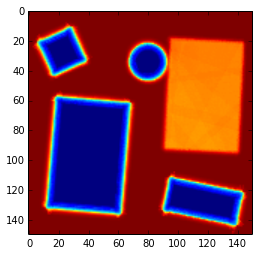

In [4]:
sequence = paths.RenderedData.test_sequence()[10]

vox_dir = paths.RenderedData.ground_truth_voxels(sequence['scene'])
gt_vox = voxel_data.load_voxels(vox_dir)
gt_vox.V[np.isnan(gt_vox.V)] = -parameters.RenderedVoxelGrid.mu
gt_vox.set_origin(gt_vox.origin)

plt.imshow(gt_vox.V[:, :, 10]);

<matplotlib.colorbar.Colorbar instance at 0x10a6dc0e0>

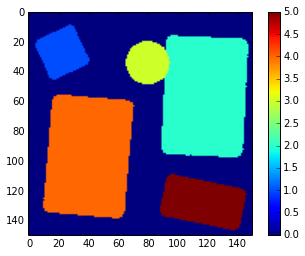

In [25]:
#  really want to just segment in the x-y direction for now...
# make it very simple and quick
gt_vox.segment_project_2d(z_threshold=2, floor_height=4)

plt.imshow(gt_vox.labels[:, :, 10]);
plt.colorbar()

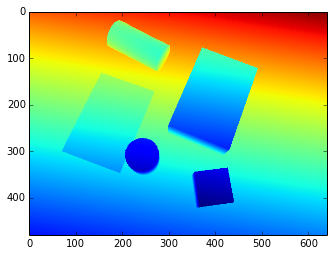

In [14]:
# now need to propgate these labels to the image itself...
frame_data = paths.RenderedData.load_scene_data(
        sequence['scene'], sequence['frames'][0])
im = images.RGBDImage.load_from_dict(
    paths.RenderedData.scene_dir(sequence['scene']),
    frame_data)
plt.imshow(im.depth);

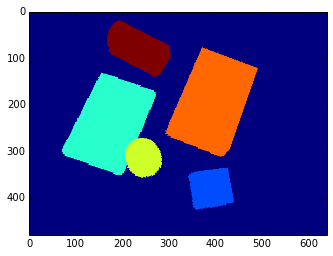

In [24]:
im.label_from_grid(gt_vox)
plt.imshow(im.labels)

Warning - training on a subset


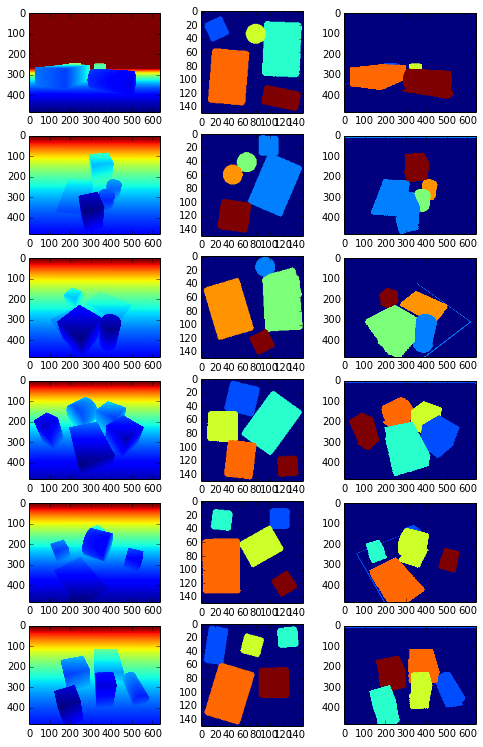

In [55]:
plt.figure(figsize=(8, 15))
sp_u, sp_v = 7, 3

for idx, sequence in enumerate(paths.RenderedData.train_sequence()):

    vox_dir = paths.RenderedData.ground_truth_voxels(sequence['scene'])
    gt_vox = voxel_data.load_voxels(vox_dir)
    gt_vox.V[np.isnan(gt_vox.V)] = -parameters.RenderedVoxelGrid.mu
    gt_vox.set_origin(gt_vox.origin)

    gt_vox.segment_project_2d(z_threshold=2, floor_height=4)

    # now need to propgate these labels to the image itself...
    frame_data = paths.RenderedData.load_scene_data(
            sequence['scene'], sequence['frames'][0])
    im = images.RGBDImage.load_from_dict(
        paths.RenderedData.scene_dir(sequence['scene']),
        frame_data)

    im.label_from_grid(gt_vox)
    plt.subplot(sp_u, sp_v, 3*idx+1)
    plt.imshow(im.depth)
    plt.subplot(sp_u, sp_v, 3*idx+2)
    plt.imshow(gt_vox.temp_2d_labels)
    plt.subplot(sp_u, sp_v, 3*idx+3)
    plt.imshow(im.labels)
    if idx >= (sp_u*sp_v)/3.0 -2 :
        break